# A polynomial curve fit

A polynomial is mapped to a set of powers of input variables. This mapping creates lots of things to a multi variable regression 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge,LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)

First, get some data. You will find GM.csv on canvas. this is 5 years of the GM stock prices, the first line is the column type, the rest are the data

In [2]:
with open("GM.csv","r") as f:
    print(f.readline())
    print(f.readline())
    f.close()

Date,Open,High,Low,Close,Adj Close,Volume

2012-10-15,24.9,25.719999,24.549999,24.59,21.056185,26219100



From this, the date is in a date format. Convert this to a number for the regression, the closing price is index 4. read in all the entries, and make a list of dates, and stock closing prices.

In [3]:
import datetime
datetime.datetime.strptime("2012-10-15","%Y-%m-%d").timestamp()

1350284400.0

In [4]:
dates=[]
closes=[]
with open("GM.csv","r") as f:
    f.readline()  # throw away first line
    for l in f:
        l.strip()
        things=l.split(",")
        dates.append([datetime.datetime.strptime(things[0],
                    "%Y-%m-%d").timestamp()])
        closes.append([float(things[4])])
    f.close()
print(dates[:5])
print(closes[:5])

[[1350284400.0], [1350889200.0], [1351494000.0], [1352102400.0], [1352707200.0]]
[[24.59], [23.280001], [25.790001], [25.040001], [23.85]]


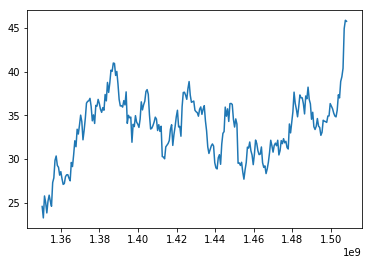

In [5]:
plt.plot(dates,closes)
plt.show()

In [6]:
model = make_pipeline(PolynomialFeatures(5), Ridge())
model.fit(dates, closes)
y_plot = model.predict(dates)

/home/morris/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.4937814989964072e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


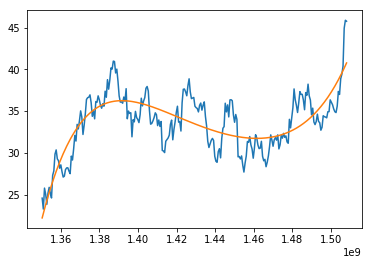

In [7]:
plt.plot(dates,closes)
plt.plot(dates,y_plot)
plt.show()

Normalize the input and output...
First, the input to 0 to 1

In [8]:
max_date=max(dates)[0]
print(max_date)
min_date=min(dates)[0]
print(min_date)
norm_date=[[(x[0]-min_date)/(max_date-min_date)] for x in dates]
norm_date[:10]

1508137200.0
1350284400.0


[[0.0],
 [0.0038314176245210726],
 [0.007662835249042145],
 [0.011517058930852034],
 [0.015348476555373107],
 [0.01917989417989418],
 [0.023011311804415253],
 [0.026842729428936327],
 [0.030674147053457397],
 [0.034505564677978474]]

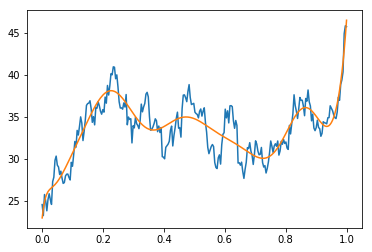

In [9]:
model2 = make_pipeline(PolynomialFeatures(15), LinearRegression())
model2.fit(norm_date, closes)
y_plot = model2.predict(norm_date)
plt.plot(norm_date,closes)
plt.plot(norm_date,y_plot)
plt.show()

In [12]:
npoints = len(norm_date)
print(npoints)
nlearn=int(npoints*0.6)
print(nlearn)
train_dates=norm_date[:nlearn]
train_closes=closes[:nlearn]
test_dates=norm_date[nlearn:]
test_closes=closes[nlearn:]

262
157


In [17]:
def cerrsq(fitval):
    model2 = make_pipeline(PolynomialFeatures(fitval), LinearRegression())
    model2.fit(train_dates, train_closes)
    test_res = model2.predict(test_dates)
    sqsum=0
    for ix in range(len(test_res)):
        err=test_closes[ix]-test_res[ix]
        sqsum += err*err
    return sqsum

In [19]:
for ix in range(1,10):
    print(ix,cerrsq(ix))

1 [ 2155.13630785]
2 [ 56525.34558378]
3 [ 17652.33245317]
4 [ 241681.55323645]
5 [ 47939065.68339044]
6 [ 845625.96780753]
7 [  7.16608809e+09]
8 [  5.61378252e+10]
9 [  1.00930803e+12]


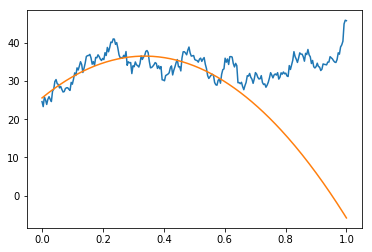

In [29]:
model2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
model2.fit(train_dates, train_closes)
test_res = model2.predict(norm_date)
test_clip = [ min(x,100) for x in test_res]
plt.plot(norm_date,closes)
plt.plot(norm_date,test_clip)
plt.show()